<a href="https://colab.research.google.com/github/Medamin9/FER-ML/blob/main/opencv_FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=43af4e8bf9e0f28710a4b9f024e893f371af90d3637d3b8c0c3f831bc5f86764
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import cv2
import matplotlib.pyplot as plt 
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
img = cv2.imread("happy.jpg")

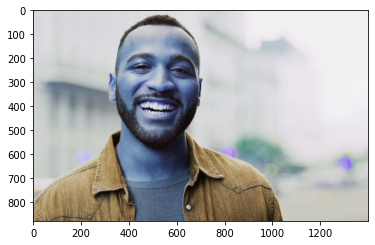

In [ ]:
plt.imshow(img)

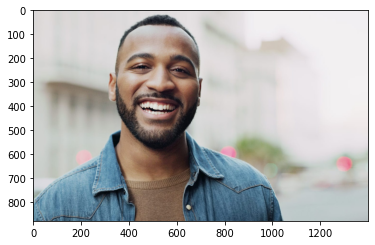

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [ ]:
predictions = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 6.34MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:17<00:00, 31.1MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:43<00:00, 12.5MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:24<00:00, 21.8MB/s]
Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 390ms/step


Action: age:  25%|██▌       | 1/4 [00:01<00:03,  1.23s/it]    

1/1 [==============================] - 1s 722ms/step


Action: gender:  50%|█████     | 2/4 [00:02<00:02,  1.28s/it]

1/1 [==============================] - 1s 746ms/step


Action: race:  75%|███████▌  | 3/4 [00:03<00:01,  1.06s/it]  

1/1 [==============================] - 1s 781ms/step


Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


In [ ]:
predictions

{'emotion': {'angry': 4.513013607265748e-06,
  'disgust': 2.1909376712992394e-14,
  'fear': 3.6384458813876197e-10,
  'happy': 98.60653877258301,
  'sad': 1.2106927727018046e-05,
  'surprise': 0.00037731422253273195,
  'neutral': 1.3930704444646835},
 'dominant_emotion': 'happy',
 'region': {'x': 325, 'y': 75, 'w': 419, 'h': 419},
 'age': 24,
 'gender': 'Man',
 'race': {'asian': 4.395343018407584e-06,
  'indian': 1.4951670304865424e-05,
  'black': 99.99988675116818,
  'white': 1.8270046287922217e-08,
  'middle eastern': 9.500534259361315e-08,
  'latino hispanic': 9.431461187978349e-05},
 'dominant_race': 'black'}

In [ ]:
type(predictions)

dict

In [ ]:
predictions["dominant_emotion"]

'happy'

# Dessiner un Rectangle sur le visage  

In [ ]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [ ]:
#har un algorithme de reconnaissance facial (non émotion) basé sur la couleur gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

# Draw a rectangle around the faces (rectangle green wight 2)
for(x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)


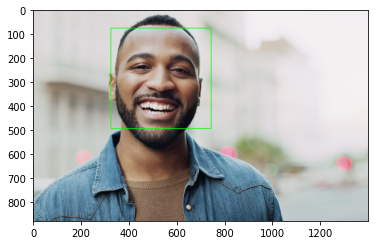

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [ ]:
#drawing the type of emotion in the image
font = cv2.FONT_HERSHEY_SIMPLEX
  # Use putText() method for
  # inserting text on video
cv2.putText(img,
                predictions ['dominant_emotion'],
                (500, 700),
                font, 5,
                (0, 0, 255),
                2,
                cv2. LINE_4);


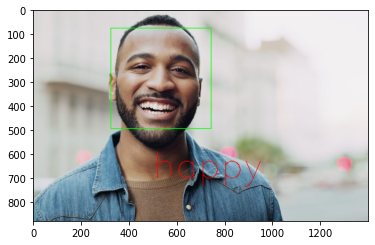

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [ ]:
img2=cv2.imread("women.jpg")

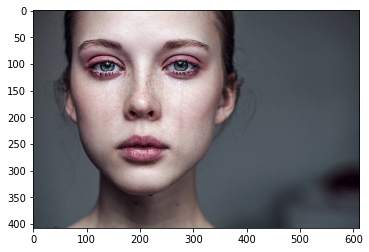

In [ ]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

In [ ]:
predictions = DeepFace.analyze(img2)

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


Action: age:  25%|██▌       | 1/4 [00:00<00:00,  5.66it/s]    

1/1 [==============================] - 0s 15ms/step


Action: gender:  50%|█████     | 2/4 [00:00<00:00,  4.82it/s]

1/1 [==============================] - 0s 22ms/step


Action: race:  75%|███████▌  | 3/4 [00:00<00:00,  6.11it/s]  

1/1 [==============================] - 0s 17ms/step


Action: race: 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]


In [ ]:
predictions

{'emotion': {'angry': 0.07678273832425475,
  'disgust': 5.9271268448846115e-09,
  'fear': 1.6006933525204659,
  'happy': 1.6192295504424692e-05,
  'sad': 19.426949322223663,
  'surprise': 0.20616641268134117,
  'neutral': 78.6893904209137},
 'dominant_emotion': 'neutral',
 'region': {'x': 55, 'y': 3, 'w': 300, 'h': 300},
 'age': 29,
 'gender': 'Woman',
 'race': {'asian': 0.08213797700591385,
  'indian': 0.04482486110646278,
  'black': 0.007228214235510677,
  'white': 89.45910334587097,
  'middle eastern': 3.6583855748176575,
  'latino hispanic': 6.748320907354355},
 'dominant_race': 'white'}

# Démonstration vidéo en temps réel pour la reconnaissance des émotions faciales

In [ ]:
import cv2 
from deepface import DeepFace 

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)
#Tester si le webcam est ouvrir correctement 
if not cap.isOpened():
  cap=cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")
while true:
  #lire un image depui le vidéo du webcam
  ret,frame = cap.read()
  result = DeepFace.analyse(frame,actions = ['emotion'])
  #print(faceCascade.empty())
  faces = faceCascade.detectMultiScale(gray,1.1,4)
  #Dessiner un rectancle environ les faces
  for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

  front = cv2.FONT_HERSHEY_SIMPLEX
  #Utiliser la méthode putText() pour inserer un text dans le video 
  cv2.putText(frame,
                result ['dominant_emotion'],
                (50, 50),
                font, 3,
                (0, 0, 255),
                2,
                cv2. LINE_4)
  cv2.imshow('Original video',frame)
  if cv2.waitKey(2) &0xFF==ord("q") :
    break
cap.release()
cv2.destroyALLWindows()

OSError: ignored